# **1. Perkenalan Dataset**


Dataset yang digunakan dalam penelitian ini adalah Stunting and Wasting Dataset yang diperoleh dari platform Kaggle sebagai salah satu public repository penyedia dataset terbuka untuk keperluan penelitian dan pembelajaran machine learning.

Dataset ini berisi data antropometri balita yang digunakan untuk mengidentifikasi kondisi stunting dan wasting berdasarkan beberapa indikator fisik. Informasi dalam dataset mencakup jenis kelamin, umur (dalam bulan), tinggi badan, berat badan, serta status stunting dan wasting. Dataset ini dirancang untuk membantu analisis status gizi balita dan dapat digunakan sebagai dasar dalam pengembangan model klasifikasi pada bidang kesehatan.

Secara keseluruhan, dataset terdiri dari 2000 data observasi dan 6 atribut, yang mencerminkan kondisi gizi balita berdasarkan pengukuran antropometri. Dataset ini dipilih karena relevan dengan permasalahan kesehatan anak, khususnya dalam upaya deteksi dini stunting dan wasting menggunakan pendekatan machine learning.


# **2. Import Library**

In [18]:
# Import library utama
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visual
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, dataset dimuat ke dalam notebook menggunakan pustaka pandas. Dataset diakses secara langsung melalui repository GitHub dalam format raw file, sehingga tidak memerlukan proses unggah manual ataupun integrasi Google Drive. Pendekatan ini memudahkan proses replikasi eksperimen dan memastikan dataset dapat diakses secara konsisten pada berbagai lingkungan.

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/hafidsopie/Eksperimen_SML_Muhammad-Hafidh-Shovi-M269D5Y0712/main/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Perempuan,1,54.6,7.0,Normal,Risk of Overweight
1,Perempuan,8,66.0,12.2,Normal,Risk of Overweight
2,Laki-laki,20,90.0,10.9,Normal,Normal weight
3,Laki-laki,13,82.4,9.6,Normal,Normal weight
4,Laki-laki,11,70.1,13.2,Normal,Risk of Overweight


### **Data Describe**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jenis Kelamin      2000 non-null   object 
 1   Umur (bulan)       2000 non-null   int64  
 2   Tinggi Badan (cm)  2000 non-null   float64
 3   Berat Badan (kg)   2000 non-null   float64
 4   Stunting           2000 non-null   object 
 5   Wasting            2000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 93.9+ KB


In [21]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,2000.000000,2000.000000,2000.000000
mean,11.955500,73.100000,9.249650
std,7.238834,11.558378,3.369569
min,0.000000,42.800000,1.000000
25%,6.000000,65.375000,6.900000
50%,12.000000,74.300000,9.200000
75%,18.000000,81.525000,11.825000
max,24.000000,97.000000,17.100000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **Visualisasi Data**

Distribution

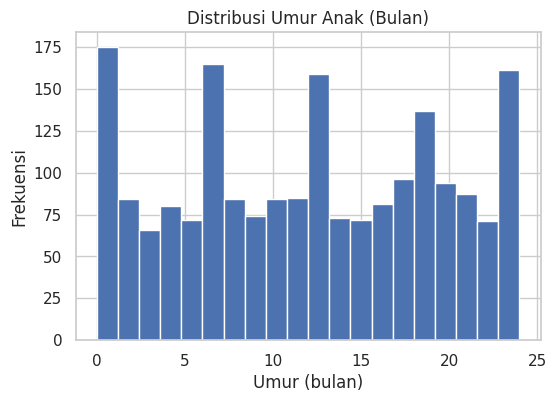

In [22]:
plt.figure(figsize=(6,4))
plt.hist(df['Umur (bulan)'], bins=20)
plt.title('Distribusi Umur Anak (Bulan)')
plt.xlabel('Umur (bulan)')
plt.ylabel('Frekuensi')
plt.show()


Distribusi Umur Anak (Bulan) menunjukkan sebaran jumlah anak berdasarkan usia dalam satuan bulan. Sumbu X merepresentasikan umur anak (0–24 bulan), sedangkan sumbu Y menunjukkan frekuensi atau jumlah anak pada setiap rentang umur. Dari grafik terlihat bahwa data usia anak tersebar di hampir seluruh rentang umur, dengan beberapa usia tertentu memiliki frekuensi lebih tinggi. Hal ini menandakan bahwa sampel mencakup variasi umur anak yang cukup merata dan dapat digunakan untuk analisis lanjutan terkait pertumbuhan atau kesehatan anak.

Relationship

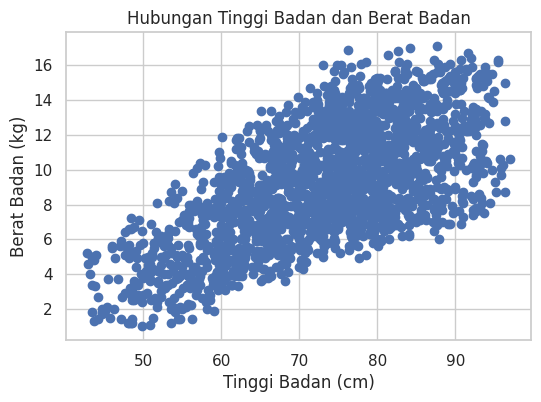

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(df['Tinggi Badan (cm)'], df['Berat Badan (kg)'])
plt.title('Hubungan Tinggi Badan dan Berat Badan')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.show()


Hubungan Tinggi Badan dan Berat Badan menunjukkan adanya korelasi positif antara tinggi badan dan berat badan anak. Semakin tinggi badan anak, cenderung semakin besar pula berat badannya. Titik-titik yang membentuk pola naik ini mengindikasikan hubungan yang cukup kuat, meskipun terdapat variasi berat badan pada tinggi yang sama. Grafik ini menggambarkan pola pertumbuhan anak yang wajar dan dapat digunakan untuk menilai kesesuaian berat badan terhadap tinggi badan.

Composition

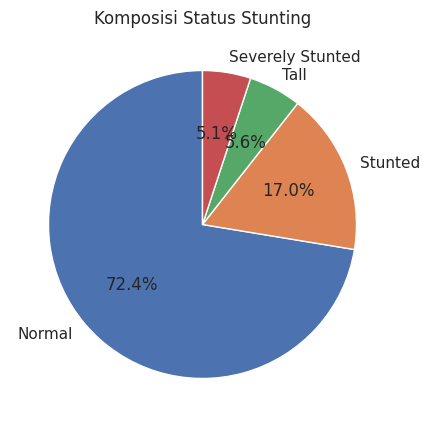

In [24]:
stunting_count = df['Stunting'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(stunting_count, labels=stunting_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Komposisi Status Stunting')
plt.show()


Komposisi Status Stunting menunjukkan proporsi status pertumbuhan anak dalam dataset. Mayoritas anak berada pada kategori Normal dengan persentase sekitar 72,4%, yang menandakan sebagian besar anak memiliki tinggi badan sesuai standar usianya. Namun, masih terdapat anak dengan status Stunted sebesar 17,0% dan Severely Stunted sekitar 5,1%, yang mengindikasikan adanya masalah pertumbuhan yang perlu mendapat perhatian. Sementara itu, kategori Tall sebesar 5,6% menunjukkan anak dengan tinggi badan di atas rata-rata. Grafik ini memberikan gambaran umum kondisi stunting dan menjadi dasar untuk evaluasi serta perencanaan intervensi gizi.

Comparison

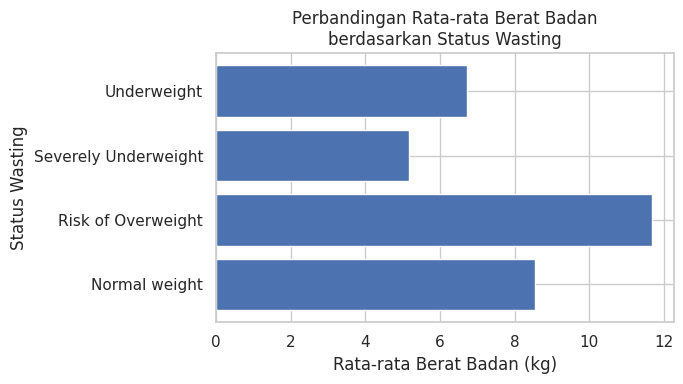

In [25]:
wasting_avg = df.groupby('Wasting')['Berat Badan (kg)'].mean()

plt.figure(figsize=(7,4))
plt.barh(wasting_avg.index, wasting_avg.values)

plt.title('Perbandingan Rata-rata Berat Badan\nberdasarkan Status Wasting')
plt.xlabel('Rata-rata Berat Badan (kg)')
plt.ylabel('Status Wasting')

plt.tight_layout()
plt.show()


Perbandingan Rata-rata Berat Badan berdasarkan Status Wasting menunjukkan perbedaan rata-rata berat badan anak pada setiap kategori wasting. Anak dengan status Severely Underweight memiliki rata-rata berat badan paling rendah, diikuti oleh kategori Underweight. Sementara itu, anak dengan status Normal weight memiliki rata-rata berat badan yang lebih tinggi, dan kategori Risk of Overweight menunjukkan rata-rata berat badan tertinggi. Grafik ini menegaskan bahwa status wasting berkaitan erat dengan berat badan anak dan dapat digunakan untuk mengidentifikasi kelompok yang membutuhkan perhatian gizi lebih lanjut.

### **Verify Data Quality Data**

### Missing Value




In [26]:
missing_values = df.isnull().sum()
print(missing_values)

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


### Duplicate Values

In [27]:
df[df.duplicated()]

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
735,Laki-laki,0,43.4,5.0,Severely Stunted,Risk of Overweight
1106,Laki-laki,17,88.8,13.7,Normal,Risk of Overweight
1489,Perempuan,9,75.1,10.4,Normal,Risk of Overweight
1566,Perempuan,18,75.5,13.8,Normal,Risk of Overweight
1924,Perempuan,23,92.6,7.8,Normal,Severely Underweight


### Outliers Values

Kolom: Umur (bulan)
Jumlah outliers: 0
-----------------------------------
Kolom: Tinggi Badan (cm)
Jumlah outliers: 0
-----------------------------------
Kolom: Berat Badan (kg)
Jumlah outliers: 0
-----------------------------------


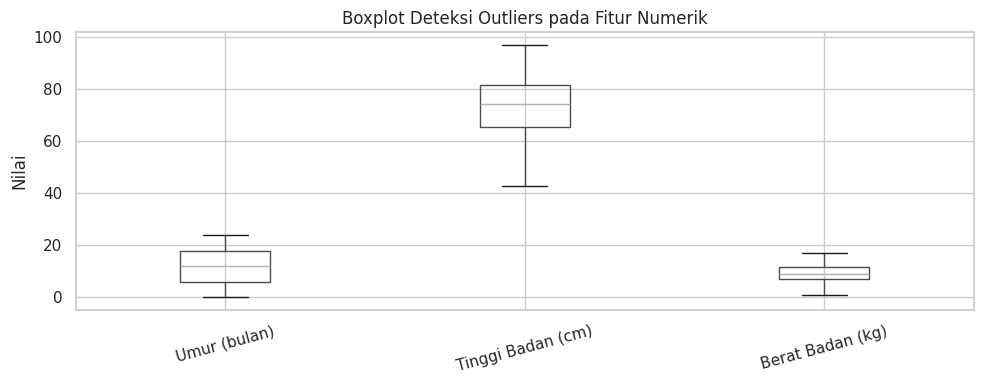

In [28]:
# Kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns
# Deteksi outliers dengan metode IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    print(f"Kolom: {col}")
    print(f"Jumlah outliers: {outliers_count}")
    print("-" * 35)

# Visualisasi boxplot untuk semua fitur numerik
plt.figure(figsize=(10,4))
df[numerical_cols].boxplot()
plt.title('Boxplot Deteksi Outliers pada Fitur Numerik')
plt.ylabel('Nilai')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

### Penanganan Missing Values

In [29]:
missing_values = df.isnull().sum()
print(missing_values)

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


Tidak ada missing values dalam dataset

### Penanganan Duplicate Values

In [30]:
print("jumlah data duplikat:", df.duplicated().sum())

# Hapus data duplikat
df = df.drop_duplicates()

# Cek jumlah data setelah dihapus
print("Jumlah data setelah dihapus:", len(df))

jumlah data duplikat: 5
Jumlah data setelah dihapus: 1995


#### Transformation Value


In [31]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({
    'Laki-laki': 0,
    'Perempuan': 1
})

#### Normalisasi atau Standarisasi Fitur

In [32]:
from sklearn.preprocessing import LabelEncoder

le_stunting = LabelEncoder()

df['Stunting'] = le_stunting.fit_transform(df['Stunting'])


#### Menghapus Fitur yang tidak relevan

In [33]:
df = df.drop(['Wasting'], axis=1)

#### Encoding Data Kategorikal

In [34]:
df = pd.get_dummies(df)

In [35]:
df.to_csv("stunting_wasting_preprocessing.csv", index=False)